https://medium.com/@yushuhearn/stock-price-prediction-using-lstm-a-step-by-step-guide-for-spy-2c1609b95741

In [72]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import matplotlib.dates as mdates


In [73]:
spy = yf.download ('SPY', start='2010-01-01', end='2021-01-01')

# split data
training_data = spy['Adj Close']['2010-01-01':'2019-12-31']
validation_data = spy['Adj Close']['2019-12-31':'2022-12-31']

# Use 'Adj Close' prices as the stock price for training
training_set = training_data.values.reshape(-1, 1)
validation_set = validation_data.values.reshape(-1, 1)
validation_set

[*********************100%%**********************]  1 of 1 completed


array([[301.29577637],
       [304.11352539],
       [301.81072998],
       [302.9621582 ],
       [302.11026001],
       [303.72033691],
       [305.77981567],
       [304.89990234],
       [306.99673462],
       [306.52868652],
       [307.22143555],
       [309.77694702],
       [310.74121094],
       [310.13269043],
       [310.17016602],
       [310.52593994],
       [307.76434326],
       [302.83105469],
       [306.0045166 ],
       [305.75170898],
       [306.74398804],
       [301.1741333 ],
       [303.41143799],
       [308.03582764],
       [311.5930481 ],
       [312.64147949],
       [310.97515869],
       [313.29678345],
       [313.83969116],
       [315.86166382],
       [315.52471924],
       [316.03018188],
       [315.21585083],
       [316.72293091],
       [315.42172241],
       [312.17340088],
       [301.82009888],
       [292.67425537],
       [291.59777832],
       [278.50167847],
       [277.33154297],
       [289.34173584],
       [281.05722046],
       [292

In [74]:
# normalize using minmaxscaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
validation_set_scaled = sc.transform(validation_set)
training_set_scaled

array([[0.03508444],
       [0.03611414],
       [0.0363888 ],
       ...,
       [0.99966418],
       [0.99220169],
       [0.99547158]])

In [75]:
# create input sequences
def create_sequences(data, seq_length=60):
    x=[]
    y=[]
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i,0])
        y.append(data[i,0])
    return np.array(x), np.array(y)

x_train, y_train = create_sequences(training_set_scaled)
x_val, y_val = create_sequences(validation_set_scaled)

#reshape input for model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

In [76]:
# Building the LSTM Model
model = keras.Sequential()
model.add(keras.layers.LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=1))

C:\Users\RIF42\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [77]:
#  Compiling the LSTM Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the Model and store history
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - loss: 0.0546 - val_loss: 0.0047
Epoch 2/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0033 - val_loss: 0.0060
Epoch 3/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0027 - val_loss: 0.0128
Epoch 4/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0026 - val_loss: 0.0061
Epoch 5/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0022 - val_loss: 0.0170


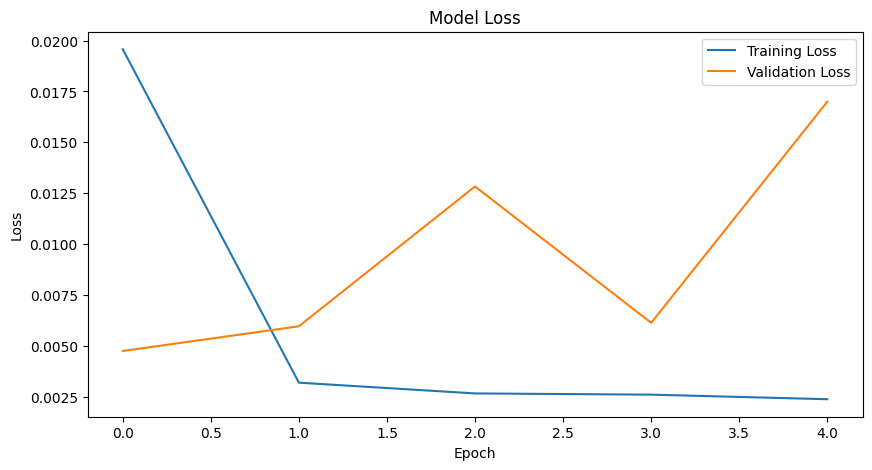

In [78]:
# Plot loss and accuracy during training
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [80]:
# Download test data for SPY from Yahoo Finance
spy_test = yf.download('SPY', start='2023-01-01', end='2023-07-31')

# Use 'Adj Close' prices as the test data
real_stock_price = spy_test['Adj Close'].values.reshape(-1, 1)

spy_test

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,384.369995,386.429993,377.829987,380.820007,373.956818,74850700
2023-01-04,383.179993,385.880005,380.000000,383.760010,376.843842,85934100
2023-01-05,381.720001,381.839996,378.760010,379.380005,372.542755,76970500
2023-01-06,382.609985,389.250000,379.410004,388.079987,381.085938,104189600
2023-01-09,390.369995,393.700012,387.670013,387.859985,380.869904,73978100
...,...,...,...,...,...,...
2023-07-24,453.369995,455.040009,452.299988,454.200012,449.379669,54023400
2023-07-25,453.920013,456.739990,453.869995,455.440002,450.606476,55191200
2023-07-26,454.470001,456.989990,453.380005,455.510010,450.675751,71052900


In [81]:
# Preparing Test Data
dataset_total = pd.concat((spy['Adj Close'], spy_test['Adj Close']), axis=0)
inputs = dataset_total[len(dataset_total) - len(spy_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [82]:
# Making Predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step


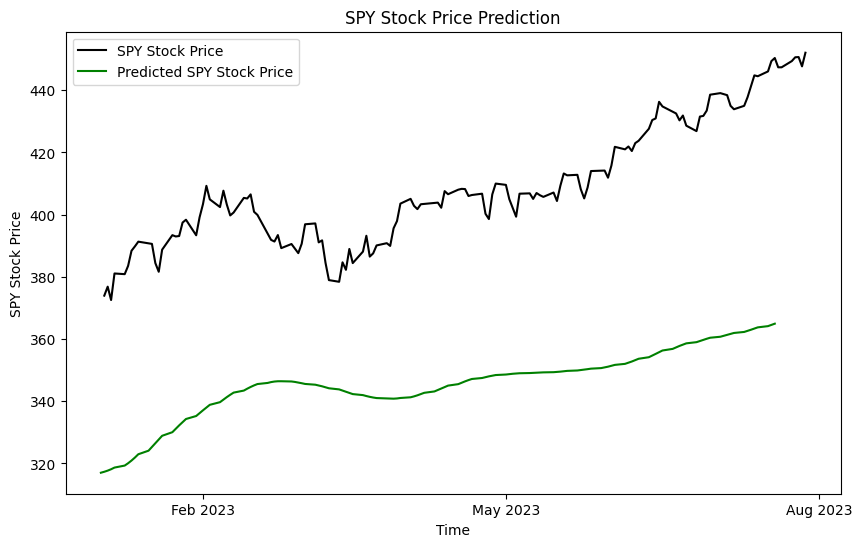

In [83]:
# Prepare dates for the predicted stock prices
date_range = pd.date_range(start='2023-01-01', periods=len(predicted_stock_price), freq='B')  # 'B' for business day frequency

# Visualizing Results with Month and Year on X-axis
plt.figure(figsize=(10, 6))
plt.plot(spy_test.index, real_stock_price, color='black', label='SPY Stock Price')
plt.plot(date_range, predicted_stock_price, color='green', label='Predicted SPY Stock Price')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show tick marks for every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format x-axis labels as 'Jan 2023', 'Feb 2023', etc.
plt.title('SPY Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SPY Stock Price')
plt.legend()
plt.show()